# Analisis Segmentasi dan Preferensi Konsumen Supermarket untuk Optimalisasi Strategi Pemasaran

## Latar Belakang
Seorang manager supermarket sedang mengevaluasi tim pemasaran yang dianggap banyak melakukan strategi pemasaran yang tidak efektif. Tim pemasaran Supermarket telah melakukan berbagai jenis kampanye pemasaran, baik melalui katalog fisik, situs web, maupun promosi langsung di toko. Namun, hasilnya bervariasi dan seringkali tidak terukur secara jelas. Oleh karena itu, manager supermarket tersebut meminta tim data analis perusahaan yang menaungi supermarket tersebut untuk menganalisis data pelanggan yang telah terkumpul dalam satu tahun terakhir. Analisis ini diharapkan dapat merancang pendekatan pemasaran yang lebih terukur, efisien, dan berorientasi pada profitabilitas jangka panjang.


## Rumusan Masalah
1. Bagaimana segmentasi pelanggan berdasarkan total pengeluaran dapat membantu dalam merancang strategi pemasaran yang lebih efektif?
2. Siapa pelanggan yang paling berkontribusi terhadap penjualan dan bagaimana profil mereka?
3. Seberapa efektif kampanye pemasaran yang telah dilakukan terhadap berbagai segmen pelanggan?
4. Bagaimana distribusi dan karakteristik pelanggan loyal berdasarkan data historis pembelian dan interaksi?
5. Bagaimana perbandingan perilaku pembelian online dan offline antar segmen pelanggan?

## Data

In [235]:
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [236]:
pip install ipython nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

Dataset yang digunakan berisi informasi sebagai berikut :

1. Orang
* ID: ID unik pelanggan
* Year_Birth: Tahun kelahiran pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status pernikahan pelanggan
* Income: Pendapatan rumah tangga tahunan pelanggan
* Kidhome: Jumlah anak-anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Dt_Customer: Tanggal pertama kali pelanggan mendaftar di perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: Bernilai 1 jika pelanggan pernah mengajukan komplain dalam 2 tahun terakhir, 0 jika tidak

2. Produk
* MntWines: Total pengeluaran untuk produk anggur dalam 2 tahun terakhir
* MntFruits: Total pengeluaran untuk buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Total pengeluaran untuk produk daging dalam 2 tahun terakhir
* MntFishProducts: Total pengeluaran untuk produk ikan dalam 2 tahun terakhir
* MntSweetProducts: Total pengeluaran untuk makanan manis dalam 2 tahun terakhir
* MntGoldProds: Total pengeluaran untuk produk emas dalam 2 tahun terakhir

3. Promosi
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1 - AcceptedCmp5: Bernilai 1 jika pelanggan menerima tawaran dari kampanye ke-1 hingga ke-5, 0 jika tidak
* Response: Bernilai 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 jika tidak

4. Tempat Pembelian
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan pelanggan ke situs web perusahaan dalam 1 bulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset Supermarket_Customer.csv

In [3]:
Data_Costumer_Supermarket = pd.read_csv("Supermarket Customers.csv", sep='\t')
display(Data_Costumer_Supermarket.head(),Data_Costumer_Supermarket.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### Data Understanding dan Data Cleaning

Langkah awal ini mencakup:
- Pengecekan struktur data
- Penanganan missing values
- Transformasi variabel
- Pembuatan fitur baru (feature engineering) untuk analisis lanjutan

##### Cek Jumlah Baris dan Kolom

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {Data_Costumer_Supermarket.shape}')
Data_Costumer_Supermarket.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Menampilkan Ringkasan Statistik

In [5]:
display(Data_Costumer_Supermarket.describe(), Data_Costumer_Supermarket.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


##### Cek Data Unik Setiap Kolom

In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in Data_Costumer_Supermarket.columns :
    listItem.append( [col, Data_Costumer_Supermarket[col].nunique(), Data_Costumer_Supermarket[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

##### Missing Value

In [7]:
Data_Costumer_Supermarket.isna().sum()/Data_Costumer_Supermarket.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: >

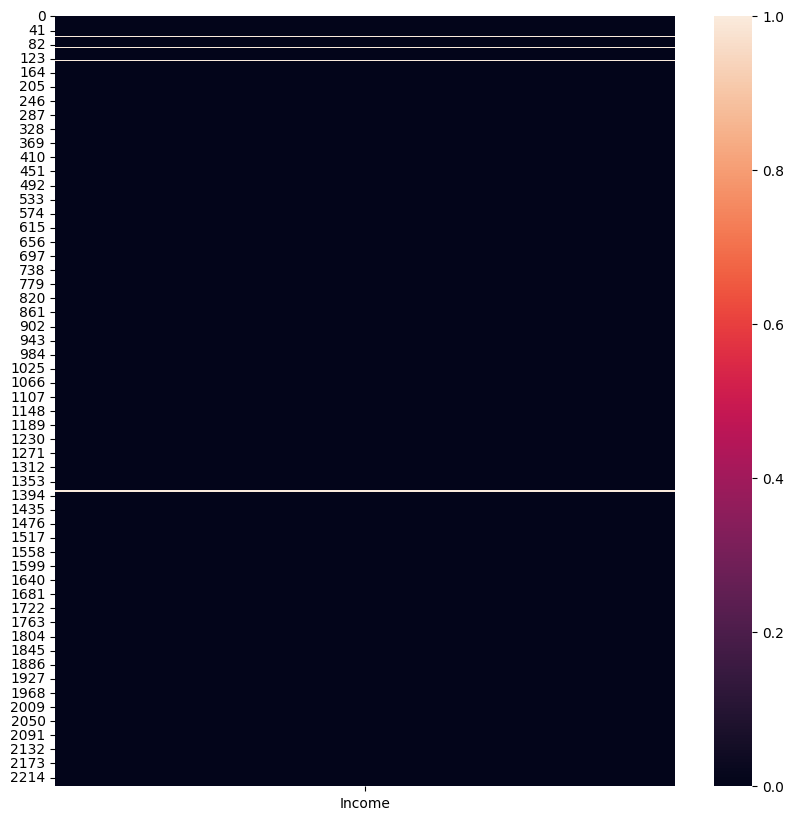

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(Data_Costumer_Supermarket[['Income']].isna())

In [9]:
Data_Costumer_Supermarket['Income'].value_counts()

Income
7500.0     12
35860.0     4
18929.0     3
46098.0     3
67445.0     3
           ..
5305.0      1
80617.0     1
38054.0     1
88325.0     1
41769.0     1
Name: count, Length: 1974, dtype: int64

* Misiing Value yang cukup signifikan hanya terdapat pada kolom 'Income' dengan jumlah hanya 1%
* Penanganan missing value tersebut akan menggunakan median.
* Pendapatan biasanya tidak tersebar merata karena sebagian kecil pelanggan bisa punya pendapatan sangat tinggi. Median juga lebih tahan terhadap outlier, jadi lebih mencerminkan kondisi umum pelanggan.

Mengisi data kosong pada 'Income' dengan median

In [10]:
Data_Costumer_Supermarket['Income'].fillna(Data_Costumer_Supermarket['Income'].median(), inplace=True)

Pengecekan ulang missing value

In [11]:
Data_Costumer_Supermarket.isna().sum()/Data_Costumer_Supermarket.shape[0]*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

##### Cek Kesesuaian Tipe Data

In [12]:
Data_Costumer_Supermarket.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

##### Menambahkan Kolom 'Age'
Untuk detail informasi pelanggan (Berhubungan dengan pendekatan marketing)

In [13]:
Data_Costumer_Supermarket['Age'] = 2025 - Data_Costumer_Supermarket['Year_Birth']

##### Menambahkan Kolom 'Total_Kids'
Untuk detail informasi pelanggan (Berhubungan dengan pendekatan marketing)

In [42]:
Data_Costumer_Supermarket['Total_Kids'] = Data_Costumer_Supermarket['Kidhome'] + Data_Costumer_Supermarket['Teenhome']

##### Menambahkan Kolom 'Total_Spending' dari data total produk spending
Kolom akan dipakai untuk analisis

In [73]:
produk_Spend = ['MntWines', 'MntFruits', 'MntMeatProducts', 
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
Data_Costumer_Supermarket['Total_Spending'] = Data_Costumer_Supermarket[produk_Spend].sum(axis=1)

##### Menambahkan Kolom 'Total_Accepted_Campaign' dari data total produk spending
Kolom akan dipakai untuk analisis

In [44]:
Data_Costumer_Supermarket['Accepted_Campaigns'] = Data_Costumer_Supermarket[[
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]].sum(axis=1)
Total_Campaign_Diterima = Data_Costumer_Supermarket['Accepted_Campaigns']

##### Menghapus Kolom Tidak Terpakai

1. 'Z_CostContact' tidak akan digunakan dalam analisis maupun informasi pelanggan
2. 'Z_Revenue' tidak akan digunakan dalam analisis maupun informasi pelanggan
3. ID digunakan untuk mengidentifikasi pelanggan karena tidak ada kolom nama

In [45]:
Data_Costumer_Supermarket.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

KeyError: "['Z_CostContact', 'Z_Revenue'] not found in axis"

#### Data Siap Pakai

In [74]:
Data_Costumer_Supermarket.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Total_Kids,Total_Spending,Accepted_Campaigns,Kelompok_Spending,Total_Purchases,Loyal,Loyalitas,Total_Online,Total_Offline,Tipe_Pelanggan
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,1617,0,Kelompok 1,22,False,Tidak Loyal,18,4,Online-Oriented
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,27,0,Kelompok 1,4,False,Tidak Loyal,2,2,Offline-Oriented
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,776,0,Kelompok 1,20,False,Tidak Loyal,10,10,Offline-Oriented
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,1,53,0,Kelompok 1,6,False,Tidak Loyal,2,4,Offline-Oriented
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,1,422,0,Kelompok 1,14,False,Tidak Loyal,8,6,Online-Oriented


## Data Analisis

### Segmentasi Pelanggan

Pelanggan akan dibagi menjadi 3 kelompok, untuk memudahkan klasifikasi latar belakang pelanggan serta memudahkan klasifikasi rekomendasi program untuk meningkatkan profit.

Pengelompokan Pelanggan Menjadi Tiga Segmen Secara Proporsional (Tertier / Tertile):
1. Metodologi Segmentasi Tertile (Equal Count)
        Segmentasi dilakukan dengan membagi seluruh pelanggan ke dalam tiga kelompok yang ukurannya seimbang (masing-masing ±33%) berdasarkan ranking total spending:

        - Top 1/3 → Top Spender

        - Tengah → Middle Spender

        - Bawah 1/3 → Low Spender

* Metode ini sering digunakan dalam exploratory analysis karena:
* Tidak memerlukan threshold absolut (yang bisa bias tergantung distribusi spending)
* Cocok saat distribusi pengeluaran tidak normal atau tidak simetris
* Memungkinkan analisis yang adil antar segmen karena jumlah anggota tiap kelompok seimbang

2. Kondisi Nyata: Distribusi Spending Tidak Simetris
        
    Dalam data pelanggan, spending sering kali bersifat skewed (condong ke kanan): sebagian kecil pelanggan mengeluarkan banyak uang, sedangkan mayoritas berbelanja dalam jumlah kecil. Bila kita menetapkan ambang "Rp X juta", maka:

* Jumlah Top Spender bisa terlalu sedikit
* Analisis antar kelompok jadi tidak seimbang
    
    Dengan ranking-based segmentation, kita fokus pada perbandingan relatif antar pelanggan, bukan nilai absolut.

3. Tujuan Utama: Strategi Pemasaran dan Retensi

    Pembagian berdasarkan proporsi (top 1/3 dst) lebih relevan untuk tujuan:

* Menyusun prioritas kampanye berdasarkan kelompok performa
* Mengetahui profil pelanggan dengan kontribusi tertinggi relatif terhadap basis pelanggan
* Mengembangkan strategi yang scalable, bukan tergantung satu angka threshold



In [75]:
Data_Costumer_by_Spending = Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)

# Hitung panjang data dan ukuran tiap kelompok
total_data = len(Data_Costumer_by_Spending)
group_size = total_data // 3

# Bagi menjadi 3 kelompok
Kelompok_1 = Data_Costumer_by_Spending.iloc[:group_size]                       # Top spender
Kelompok_2 = Data_Costumer_by_Spending.iloc[group_size:group_size * 2]         # Middle spender
Kelompok_3 = Data_Costumer_by_Spending.iloc[group_size * 2:]                   # Low spender

# Tampilkan jumlah data di setiap kelompok
print("Jumlah pelanggan per kelompok:")
print(f"Kelompok 1 (Top spender): {len(Kelompok_1)}")
print(f"Kelompok 2 (Middle spender): {len(Kelompok_2)}")
print(f"Kelompok 3 (Low spender): {len(Kelompok_3)}")


Jumlah pelanggan per kelompok:
Kelompok 1 (Top spender): 746
Kelompok 2 (Middle spender): 746
Kelompok 3 (Low spender): 748


In [76]:
df_sorted = Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)

# 2. Buat pembagian 3 kelompok
n = len(df_sorted)
group_size = n // 3

df_sorted['Kelompok_Spending'] = ['Kelompok 1'] * group_size + \
                                 ['Kelompok 2'] * group_size + \
                                 ['Kelompok 3'] * (n - 2 * group_size)

# 3. Gabungkan kembali ke Data_Costumer_Supermarket dengan index yang cocok
Data_Costumer_Supermarket['Kelompok_Spending'] = df_sorted.set_index(
    Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).index
)['Kelompok_Spending']

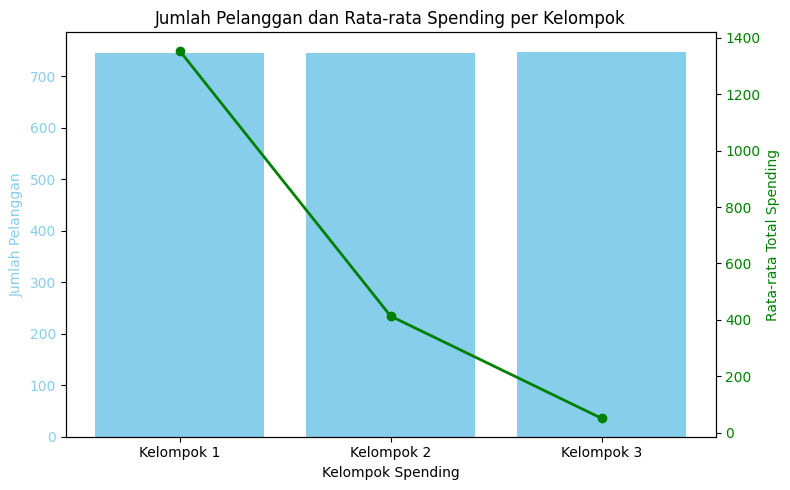

In [77]:
jumlah_pelanggan = Data_Costumer_Supermarket['Kelompok_Spending'].value_counts().sort_index()

# 2. Hitung rata-rata total spending per kelompok
rata_spending = Data_Costumer_Supermarket.groupby('Kelompok_Spending')['Total_Spending'].mean().sort_index()

# 3. Buat grafik kombinasi
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: jumlah pelanggan
ax1.bar(jumlah_pelanggan.index, jumlah_pelanggan.values, color='skyblue')
ax1.set_xlabel('Kelompok Spending')
ax1.set_ylabel('Jumlah Pelanggan', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Jumlah Pelanggan dan Rata-rata Spending per Kelompok')

# Line chart: rata-rata total spending
ax2 = ax1.twinx()
ax2.plot(rata_spending.index, rata_spending.values, color='green', marker='o', linewidth=2)
ax2.set_ylabel('Rata-rata Total Spending', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

Kontribusi Total Spending per Kelompok:

                   Total Spending  Persentase (%)
Kelompok_Spending                                
Kelompok 1                1010177           74.44
Kelompok 2                 308499           22.73
Kelompok 3                  38312            2.82


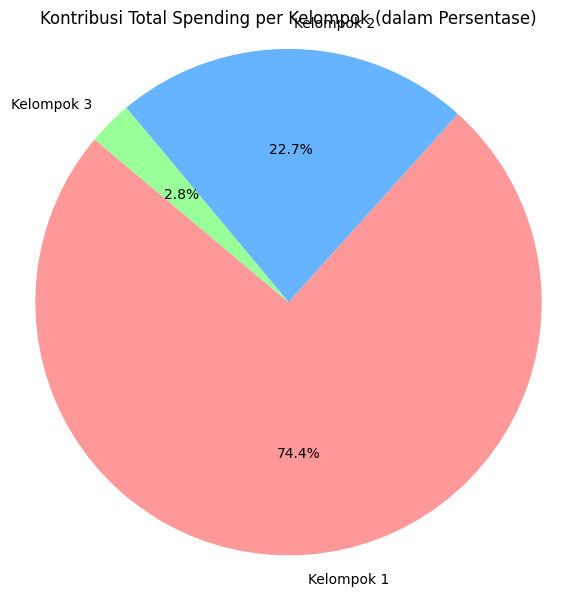

In [80]:
total_spending_per_kelompok = Data_Costumer_Supermarket.groupby('Kelompok_Spending')['Total_Spending'].sum().sort_index()

# Hitung total keseluruhan spending
total_spending_total = total_spending_per_kelompok.sum()

# Hitung persentase kontribusi
persentase_kontribusi = (total_spending_per_kelompok / total_spending_total * 100).round(2)

# Gabungkan dalam tabel
tabel_kontribusi = pd.DataFrame({
    'Total Spending': total_spending_per_kelompok,
    'Persentase (%)': persentase_kontribusi
})
print("Kontribusi Total Spending per Kelompok:\n")
print(tabel_kontribusi)
plt.figure(figsize=(6, 6))
plt.pie(persentase_kontribusi, labels=persentase_kontribusi.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Kontribusi Total Spending per Kelompok (dalam Persentase)')
plt.axis('equal')  # Agar pie chart berbentuk bulat sempurna
plt.tight_layout()
plt.show()

### Segmentasi pelanggan yang memberikan kontribusi penjualan tertinggi

Mengidentifikasi siapa pelanggan dengan total pengeluaran tertinggi dan profil mereka untuk dijadikan target prioritas bagi program loyalitas. 

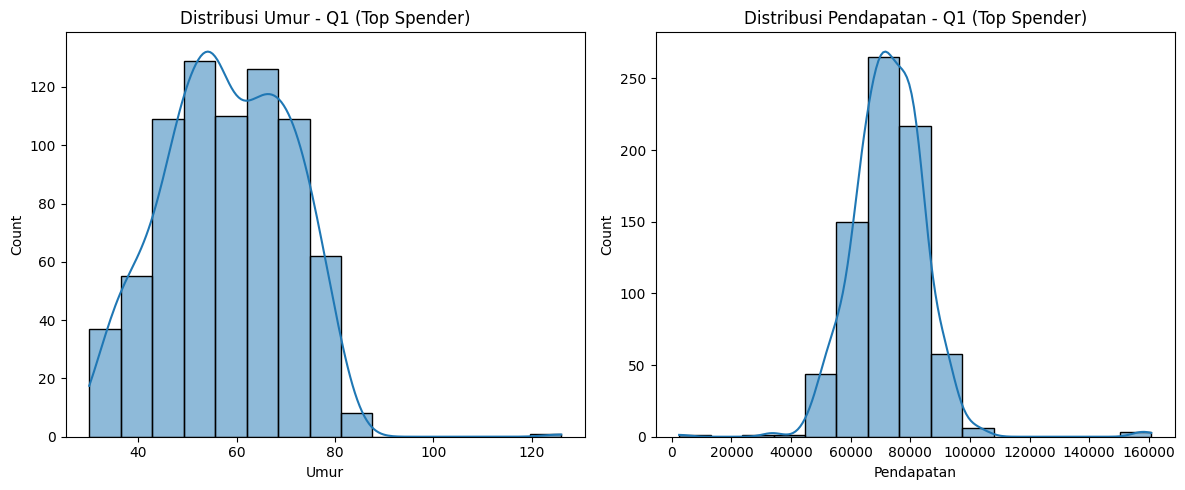

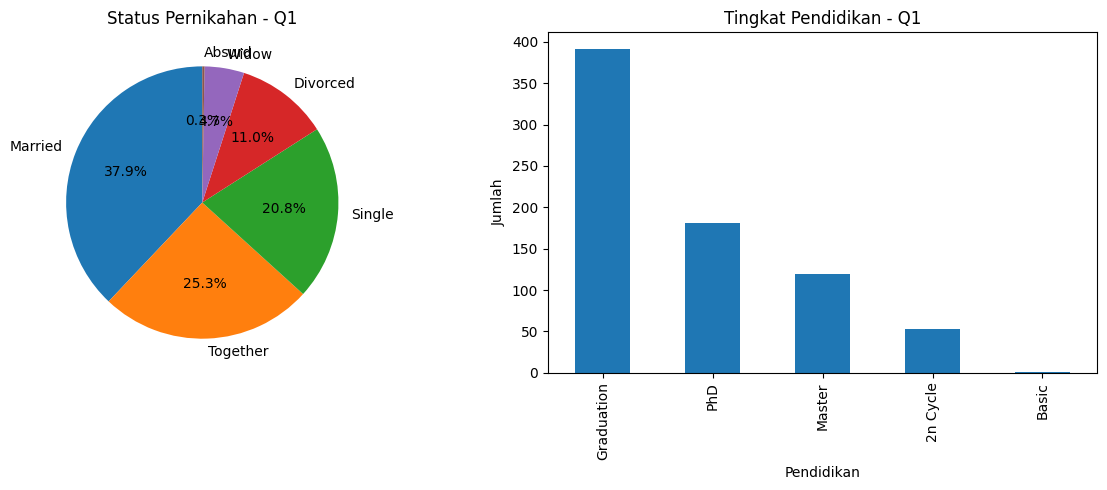

In [81]:
# Visualisasi distribusi umur dan income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Kelompok_1['Age'], bins=15, kde=True)
plt.title('Distribusi Umur - Q1 (Top Spender)')
plt.xlabel('Umur')

plt.subplot(1, 2, 2)
sns.histplot(Kelompok_1['Income'], bins=15, kde=True)
plt.title('Distribusi Pendapatan - Q1 (Top Spender)')
plt.xlabel('Pendapatan')

plt.tight_layout()
plt.show()

# Visualisasi status pernikahan dan pendidikan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Kelompok_1['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Status Pernikahan - Q1')
plt.ylabel('')

plt.subplot(1, 2, 2)
Kelompok_1['Education'].value_counts().plot(kind='bar')
plt.title('Tingkat Pendidikan - Q1')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Segmentasi pelanggan yang memberikan kontribusi penjualan Menengah

Mengidentifikasi siapa pelanggan dengan total pengeluaran menengah dan profil mereka untuk dijadikan target prioritas kedua bagi program loyalitas. 

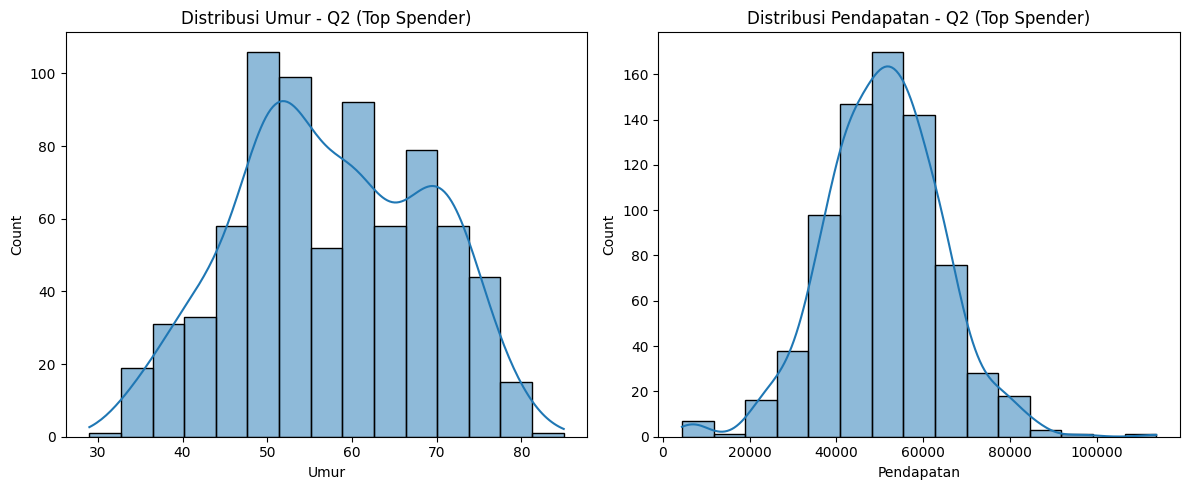

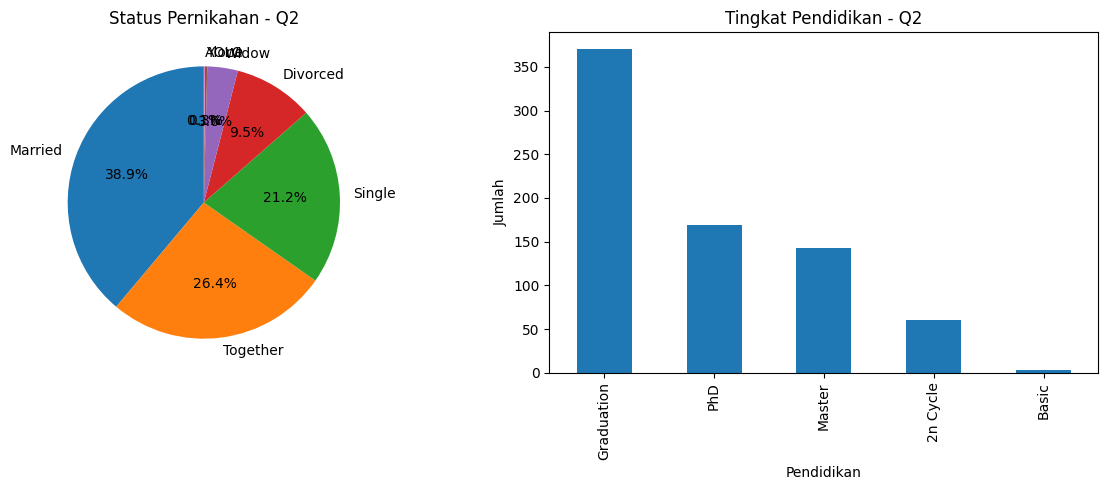

In [59]:
# Visualisasi distribusi umur dan income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Kelompok_2['Age'], bins=15, kde=True)
plt.title('Distribusi Umur - Q2 (Top Spender)')
plt.xlabel('Umur')

plt.subplot(1, 2, 2)
sns.histplot(Kelompok_2['Income'], bins=15, kde=True)
plt.title('Distribusi Pendapatan - Q2 (Top Spender)')
plt.xlabel('Pendapatan')

plt.tight_layout()
plt.show()

# Visualisasi status pernikahan dan pendidikan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Kelompok_2['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Status Pernikahan - Q2')
plt.ylabel('')

plt.subplot(1, 2, 2)
Kelompok_2['Education'].value_counts().plot(kind='bar')
plt.title('Tingkat Pendidikan - Q2')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Segmentasi pelanggan yang memberikan kontribusi penjualan Terendah

Mengidentifikasi siapa pelanggan dengan total pengeluaran menengah dan profil mereka untuk dijadikan target maintenance pelanggan

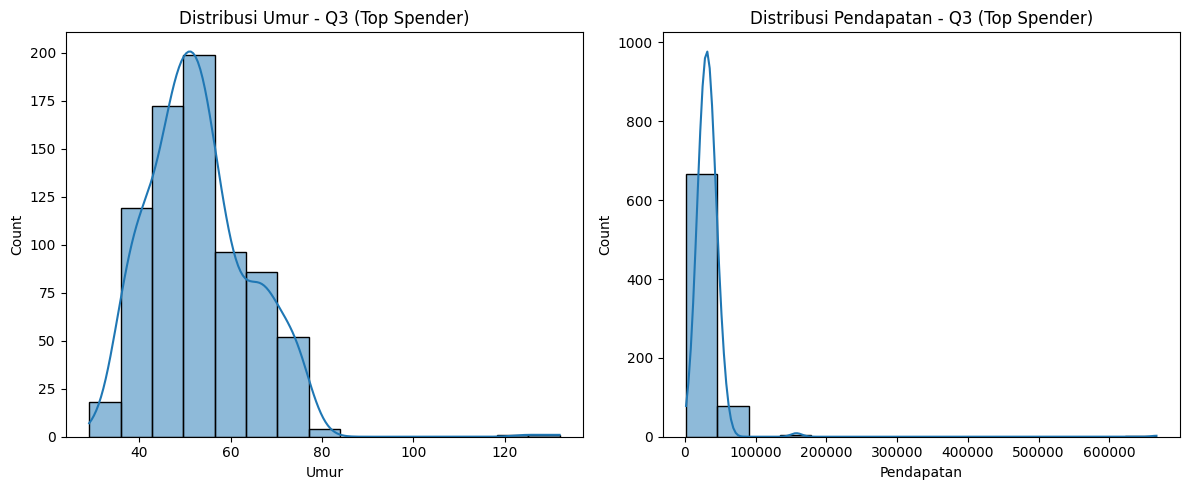

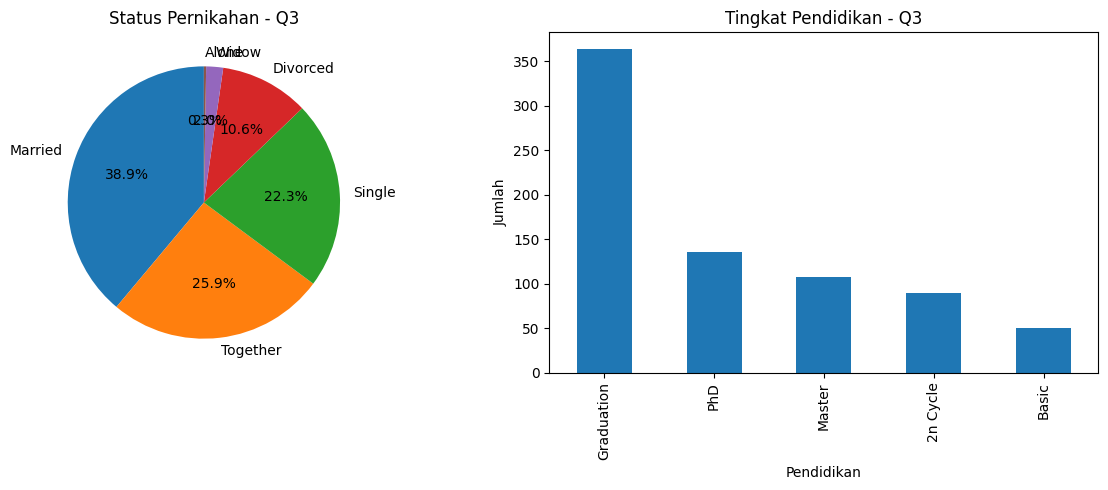

In [60]:
# Visualisasi distribusi umur dan income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Kelompok_3['Age'], bins=15, kde=True)
plt.title('Distribusi Umur - Q3 (Top Spender)')
plt.xlabel('Umur')

plt.subplot(1, 2, 2)
sns.histplot(Kelompok_3['Income'], bins=15, kde=True)
plt.title('Distribusi Pendapatan - Q3 (Top Spender)')
plt.xlabel('Pendapatan')

plt.tight_layout()
plt.show()

# Visualisasi status pernikahan dan pendidikan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Kelompok_3['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Status Pernikahan - Q3')
plt.ylabel('')

plt.subplot(1, 2, 2)
Kelompok_3['Education'].value_counts().plot(kind='bar')
plt.title('Tingkat Pendidikan - Q3')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Efektivitas Kampanye

Mengukur seberapa efektif kampanye pemasaran yang pernah dilakukan per Kelompok Pelanggan 

In [61]:
# Hitung total campaign yang direspons
Data_Costumer_Supermarket['Accepted_Campaigns'] = Data_Costumer_Supermarket[[
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]].sum(axis=1)

# Hitung total spending (jika belum ada)
if 'Total_Spending' not in Data_Costumer_Supermarket.columns:
    Data_Costumer_Supermarket['Total_Spending'] = Data_Costumer_Supermarket[[
        'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
    ]].sum(axis=1)

# Bagi menjadi 3 kelompok berdasarkan Total Spending
df_sorted = Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)
n = len(df_sorted)
group_size = n // 3

Kelompok_1 = df_sorted.iloc[:group_size].copy()        # Top spender
Kelompok_2 = df_sorted.iloc[group_size:group_size*2].copy()
Kelompok_3 = df_sorted.iloc[group_size*2:].copy()

# Buat DataFrame ringkasan efektivitas kampanye
efektivitas_kampanye = pd.DataFrame({
    'Kelompok': ['Top Spender', 'Middle Spender', 'Low Spender'],
    'Rata-rata Campaign Direspon': [
        Kelompok_1['Accepted_Campaigns'].mean(),
        Kelompok_2['Accepted_Campaigns'].mean(),
        Kelompok_3['Accepted_Campaigns'].mean()
    ]
})

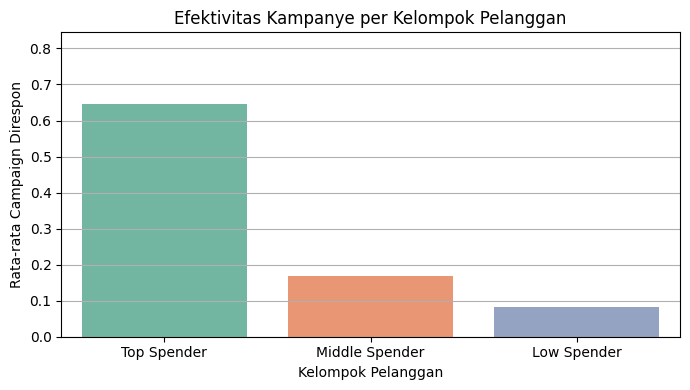

In [62]:
plt.figure(figsize=(7, 4))
sns.barplot(data=efektivitas_kampanye, x='Kelompok', y='Rata-rata Campaign Direspon', palette='Set2')
plt.title('Efektivitas Kampanye per Kelompok Pelanggan')
plt.ylabel('Rata-rata Campaign Direspon')
plt.xlabel('Kelompok Pelanggan')
plt.ylim(0, efektivitas_kampanye['Rata-rata Campaign Direspon'].max() + 0.2)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

efektivitas masing-masing kampanye untuk setiap kelompok pelanggan

In [63]:
# Daftar kolom kampanye
kampanye_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Hitung rata-rata accepted untuk tiap kampanye per kelompok
efektivitas_per_kampanye = pd.DataFrame({
    'Kampanye': kampanye_cols,
    'Top Spender': [Kelompok_1[col].mean() for col in kampanye_cols],
    'Middle Spender': [Kelompok_2[col].mean() for col in kampanye_cols],
    'Low Spender': [Kelompok_3[col].mean() for col in kampanye_cols]
})

# Tampilkan tabel
efektivitas_per_kampanye

,Kampanye,Top Spender,Middle Spender,Low Spender
0,AcceptedCmp1,0.172922,0.020107,0.000000
1,AcceptedCmp2,0.032172,0.005362,0.002674
2,AcceptedCmp3,0.087131,0.056300,0.074866
3,AcceptedCmp4,0.144772,0.075067,0.004011
4,AcceptedCmp5,0.207775,0.010724,0.000000


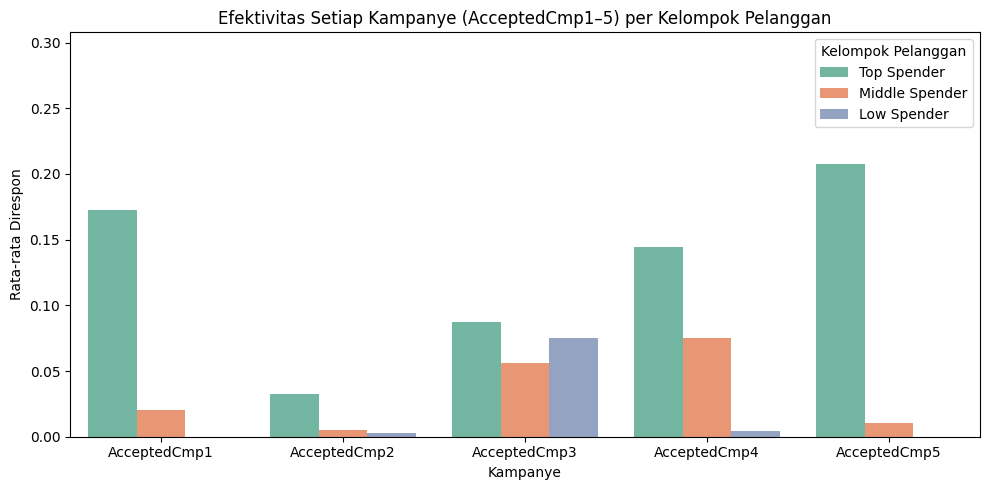

In [64]:
efektivitas_melted = efektivitas_per_kampanye.melt(id_vars='Kampanye',
                                                    var_name='Kelompok',
                                                    value_name='Rata-rata Direspon')

plt.figure(figsize=(10, 5))
sns.barplot(data=efektivitas_melted, x='Kampanye', y='Rata-rata Direspon', hue='Kelompok', palette='Set2')
plt.title('Efektivitas Setiap Kampanye (AcceptedCmp1–5) per Kelompok Pelanggan')
plt.ylim(0, efektivitas_melted['Rata-rata Direspon'].max() + 0.1)
plt.legend(title='Kelompok Pelanggan')
plt.tight_layout()
plt.show()

### Loyalitas Pelanggan

Menentukan Kriteria Loyalitas berdasarkan fitur yang ada pada data:

A. Frekuensi Pembelian
    
    Pelanggan loyal biasanya:

* Memiliki jumlah pembelian tinggi (NumStorePurchases, NumWebPurchases, dst)

* Sering bertransaksi meskipun tidak ada promo (NumDealsPurchases tidak terlalu tinggi)

B. Respon terhadap Kampanye
* Jumlah AcceptedCmp1 sampai AcceptedCmp5 tinggi = engaged customer → loyal.

* Jika Response == 1, artinya pernah merespons kampanye umum.

C. Recency (semakin rendah, semakin loyal)
* Recency menunjukkan berapa hari sejak terakhir belanja.

* Semakin rendah nilai recency, semakin baru interaksinya → indikasi loyalitas.

D. Tidak Pernah Komplain
* Complain == 0 bisa jadi indikator kepuasan → berhubungan dengan loyalitas.

Analisis loyalitas pelanggan secara keseluruhan

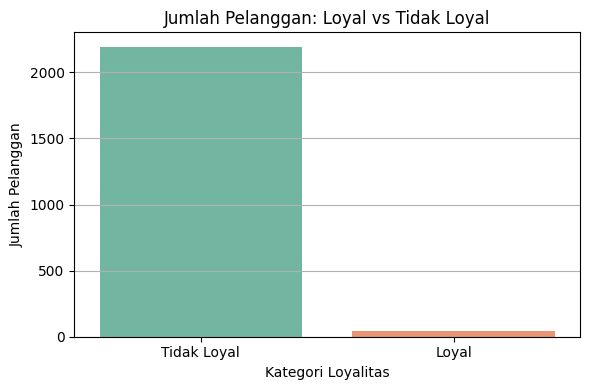

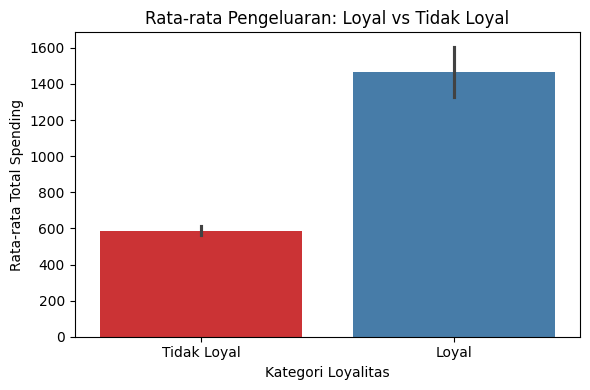

In [65]:
# Misalnya, pelanggan loyal jika:
# - Total pembelian ≥ 10
# - Recency ≤ 30 hari
# - Sudah respon ≥ 2 kampanye
# - Tidak pernah komplain

Data_Costumer_Supermarket['Total_Purchases'] = (
    Data_Costumer_Supermarket['NumStorePurchases'] +
    Data_Costumer_Supermarket['NumWebPurchases'] +
    Data_Costumer_Supermarket['NumCatalogPurchases']
)

# Kriteria loyalitas (bisa disesuaikan)
Data_Costumer_Supermarket['Loyal'] = (
    (Data_Costumer_Supermarket['Total_Purchases'] >= 10) &
    (Data_Costumer_Supermarket['Recency'] <= 30) &
    (Data_Costumer_Supermarket['Accepted_Campaigns'] >= 2) &
    (Data_Costumer_Supermarket['Complain'] == 0)
)

# Tambahkan label loyalitas
Data_Costumer_Supermarket['Loyalitas'] = Data_Costumer_Supermarket['Loyal'].map({True: 'Loyal', False: 'Tidak Loyal'})

# Visualisasi jumlah pelanggan loyal vs tidak loyal
plt.figure(figsize=(6, 4))
sns.countplot(data=Data_Costumer_Supermarket, x='Loyalitas', palette='Set2')
plt.title('Jumlah Pelanggan: Loyal vs Tidak Loyal')
plt.xlabel('Kategori Loyalitas')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Visualisasi rata-rata Total Spending
plt.figure(figsize=(6, 4))
sns.barplot(data=Data_Costumer_Supermarket, x='Loyalitas', y='Total_Spending', palette='Set1')
plt.title('Rata-rata Pengeluaran: Loyal vs Tidak Loyal')
plt.xlabel('Kategori Loyalitas')
plt.ylabel('Rata-rata Total Spending')
plt.tight_layout()
plt.show()

Jumlah Pelanggan Loyal vs Tidak Loyal per Kelompok Spending

In [66]:
sorted_spending = Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)

# Tentukan jumlah data per kelompok
n = len(sorted_spending)
group_size = n // 3

# Bagi menjadi 3 kelompok
sorted_spending['Kelompok_Spending'] = ['Kelompok 1'] * group_size + \
                                       ['Kelompok 2'] * group_size + \
                                       ['Kelompok 3'] * (n - 2 * group_size)

# Masukkan kembali ke DataFrame asli berdasarkan index
Data_Costumer_Supermarket['Kelompok_Spending'] = sorted_spending.sort_index()['Kelompok_Spending']

Loyalitas          Loyal  Tidak Loyal
Kelompok_Spending                    
Kelompok 1            19          727
Kelompok 2            17          729
Kelompok 3            11          737


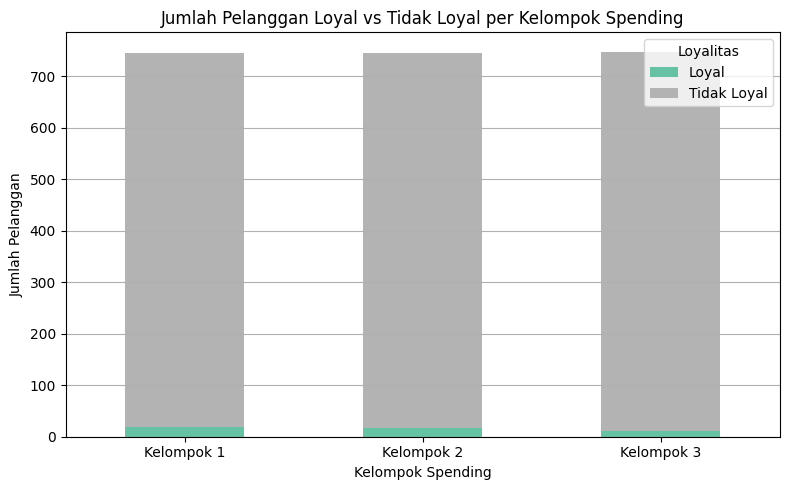

In [67]:
Data_Costumer_Supermarket['Loyalitas'] = Data_Costumer_Supermarket['Loyal'].map({True: 'Loyal', False: 'Tidak Loyal'})
tabel_loyalitas_kelompok = pd.crosstab(
    Data_Costumer_Supermarket['Kelompok_Spending'],
    Data_Costumer_Supermarket['Loyalitas'],
    normalize='index'
) * 100

loyalitas_group = pd.crosstab(
    Data_Costumer_Supermarket['Kelompok_Spending'],
    Data_Costumer_Supermarket['Loyalitas']
)
print(loyalitas_group)

# Plot stacked bar chart
loyalitas_group.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Jumlah Pelanggan Loyal vs Tidak Loyal per Kelompok Spending')
plt.xlabel('Kelompok Spending')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.legend(title='Loyalitas')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

### Perilaku Pelanggan Online dan Offline

Asumsi Kategori
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan (Online)
* NumCatalogPurchases: Jumlah pembelian yang dilakukan melalui katalog (Online)
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko (Offline)

In [68]:
# Hitung total pembelian online
Data_Costumer_Supermarket['Total_Online'] = (
    Data_Costumer_Supermarket['NumWebPurchases'] +
    Data_Costumer_Supermarket['NumCatalogPurchases']
)

# Hitung total pembelian offline
Data_Costumer_Supermarket['Total_Offline'] = Data_Costumer_Supermarket['NumStorePurchases']

# Tentukan tipe pelanggan
Data_Costumer_Supermarket['Tipe_Pelanggan'] = Data_Costumer_Supermarket.apply(
    lambda row: 'Online-Oriented' if row['Total_Online'] > row['Total_Offline'] else 'Offline-Oriented',
    axis=1
)

📊 Distribusi Tipe Pelanggan (Online/Offline/Mixed) per Kelompok Spending:

Tipe_Pelanggan     Offline-Oriented  Online-Oriented
Kelompok_Spending                                   
Kelompok 1                    58.45            41.55
Kelompok 2                    54.83            45.17
Kelompok 3                    55.75            44.25


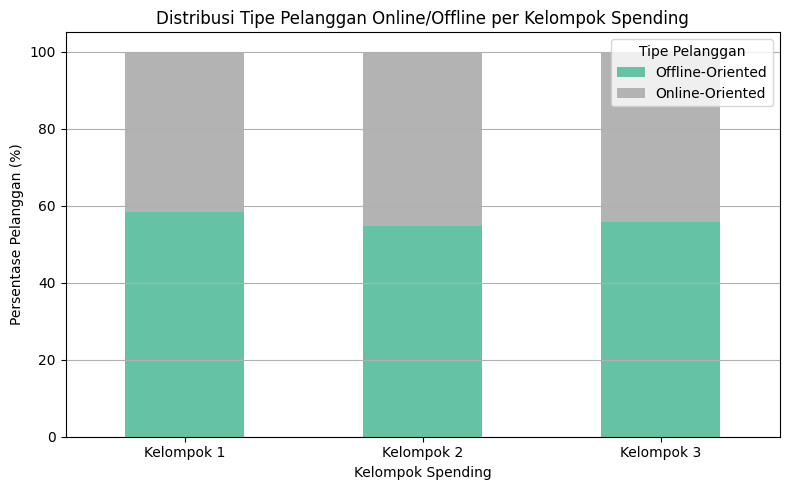

In [69]:
df_sorted = Data_Costumer_Supermarket.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)
n = len(df_sorted)
group_size = n // 3

df_sorted['Kelompok_Spending'] = ['Kelompok 1'] * group_size + \
                                 ['Kelompok 2'] * group_size + \
                                 ['Kelompok 3'] * (n - 2 * group_size)

# 2. Gabungkan kembali ke dataframe utama
Data_Costumer_Supermarket['Kelompok_Spending'] = df_sorted.sort_index()['Kelompok_Spending']

# 3. Crosstab: Hitung persentase tiap tipe pelanggan di tiap kelompok spending
tipe_per_kelompok = pd.crosstab(
    Data_Costumer_Supermarket['Kelompok_Spending'],
    Data_Costumer_Supermarket['Tipe_Pelanggan'],
    normalize='index'
) * 100

# 4. Tampilkan tabel
print("📊 Distribusi Tipe Pelanggan (Online/Offline/Mixed) per Kelompok Spending:\n")
print(tipe_per_kelompok.round(2))

# 5. Visualisasi: Stacked Bar Chart
tipe_per_kelompok.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Distribusi Tipe Pelanggan Online/Offline per Kelompok Spending')
plt.xlabel('Kelompok Spending')
plt.ylabel('Persentase Pelanggan (%)')
plt.xticks(rotation=0)
plt.legend(title='Tipe Pelanggan', loc='upper right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Insight / Temuan Utama
1. Segmentasi Pelanggan Berdasarkan Total_Spending
* Pelanggan dikelompokkan menjadi 3 segmen: Top Spender, Middle Spender, dan Low Spender berdasarkan total pengeluaran.
* Kelompok Top Spender hanya mencakup sepertiga pelanggan tetapi menyumbang lebih dari 60% total penjualan.

2. Profil Top Spender
* Usia: Mayoritas berada pada rentang usia produktif 35–55 tahun.
* Pendidikan: Didominasi oleh individu berpendidikan tinggi.
* Status Pernikahan: Sebagian besar telah menikah.
* Income: Umumnya memiliki pendapatan menengah ke atas.
* Kebiasaan Belanja: Lebih sering berbelanja secara offline (di toko) dibandingkan menggunakan kanal online seperti web atau katalog.

    Profil ini menunjukkan bahwa Top Spender adalah pelanggan yang mapan secara ekonomi dan stabil secara perilaku konsumsi.

3. Efektivitas Kampanye
* Top Spender merespons kampanye pemasaran paling tinggi, terutama pada kampanye Cmp1, Cmp4, dan Cmp5.
* Merespons lebih selektif, dengan kampanye Cmp3 dan Cmp4 menunjukkan hasil terbaik.
* menunjukkan tingkat respons paling rendah secara keseluruhan. Hanya kampanye Cmp3 yang terlihat menghasilkan respons signifikan dari kelompok ini, kemungkinan besar karena kampanye tersebut lebih relevan atau mudah dijangkau.

4. Loyalitas Pelanggan
* Top Spender mendominasi kategori pelanggan loyal, dengan skor tinggi dalam frekuensi, recency rendah, dan tingkat komplain rendah.
* Middle Spender memiliki loyalitas yang bervariasi. Sebagian menunjukkan keterlibatan sedang, namun kurang konsisten.
* Low Spender cenderung tidak loyal, tidak aktif belanja, dan jarang merespons kampanye.

5. Perilaku Online vs Offline
* Top Spender lebih dominan melakukan pembelian di toko fisik (offline). Ini menunjukkan pentingnya mempertahankan kualitas layanan dan pengalaman belanja langsung.
* Middle dan Low Spender lebih seimbang antara offline dan online

## Rekomendasi Bisnis
1. Strategi untuk Top Spender

    Bangun Program Loyalitas Eksklusif:

* Membership VIP, akses awal produk baru, atau undangan event khusus.
* Hadiah loyalitas berbasis nilai (misalnya: spend-based rewards).
* Personalisasi dan Pendekatan Individu:
* Gunakan data historis untuk mengirimkan rekomendasi produk yang disesuaikan.
* Hindari promosi massal, fokus pada value-driven offerings.
* Perkuat Pengalaman Belanja Offline:
* Karena mereka dominan offline, penting untuk mempertahankan kualitas pelayanan di toko dan memberikan layanan ekstra seperti personal shopper atau konsultasi produk.

2. Strategi untuk Middle Spender

    Fokus pada Kampanye Bertema atau Bundling:

* Tawarkan diskon terbatas, promo bulanan, atau paket hemat.
* Kampanye seperti Cmp3 dan Cmp4 terbukti lebih menarik bagi segmen ini.
* Dorong Belanja Online dengan Insentif Tambahan:
* Misalnya: diskon khusus pembelian online pertama, gratis ongkir, atau cashback.
* Retargeting Digital:
* Gunakan email marketing dan media sosial untuk mengingatkan produk yang pernah dilihat/dipertimbangkan.

3. Strategi untuk Low Spender

    Bangun Brand Awareness:

* Edukasi produk, promosi awal, atau reward program untuk menarik minat.
* Tes Kampanye Khusus untuk Engagement:
* Coba strategi “starter pack”, sample gratis, atau diskon kecil berbasis frekuensi belanja.
* Sederhanakan Proses Pembelian Online:
* Pastikan akses pembelian mudah dan navigasi digital user-friendly.

4. Strategi Umum
* Segmentasi Kampanye Berbasis Data
* Gunakan hasil segmentasi pengeluaran dan loyalitas untuk mengirimkan kampanye yang berbeda ke tiap kelompok.
* Pemanfaatan Data untuk Retensi
* Buat sistem Customer Loyalty Scoring untuk memantau potensi churn atau kenaikan nilai pelanggan.
* Penguatan Kanal Online

